# Deep Learning

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = Path("../Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [4]:
test_df = pd.DataFrame(y, columns=['y'])
test_df.y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: y, dtype: int64

In [5]:
test_df.y.mean()

5.6360225140712945

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_class = enc.fit_transform(y.reshape(-1,1)).toarray()
y_class

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [7]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [8]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
#nn.add(Dense(units=1, activation="linear"))
nn.add(Dense(units=6, activation="softmax"))
# Pass through the output of the y=mx+b without doing anything, y= y

In [9]:
# Compile the model
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# y_hat-y^2
# Train the model
model_1 = nn.fit(X, y_class, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 2s 36ms/step - loss: 1.8334 - accuracy: 0.2076 - val_loss: 1.8398 - val_accuracy: 0.1688
Epoch 2/200
35/35 [==============================] - 0s 6ms/step - loss: 1.6713 - accuracy: 0.3215 - val_loss: 1.6928 - val_accuracy: 0.2542
Epoch 3/200
35/35 [==============================] - 0s 6ms/step - loss: 1.5450 - accuracy: 0.4114 - val_loss: 1.5747 - val_accuracy: 0.3333
Epoch 4/200
35/35 [==============================] - 0s 6ms/step - loss: 1.4489 - accuracy: 0.4666 - val_loss: 1.4816 - val_accuracy: 0.3979
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 1.4224 - accuracy: 0.4615 - val_loss: 1.4036 - val_accuracy: 0.4208
Epoch 6/200
35/35 [==============================] - 0s 6ms/step - loss: 1.2970 - accuracy: 0.5109 - val_loss: 1.3413 - val_accuracy: 0.4625
Epoch 7/200
35/35 [==============================] - 0s 6ms/step - loss: 1.2666 - accuracy: 0.5238 - val_loss: 1.2904 - val_accuracy: 0.4854
Epoch 8/200


In [10]:
pred = nn.predict(X[:100])

In [11]:
pred

array([[8.16815475e-04, 3.65511924e-02, 7.51177192e-01, 2.07759947e-01,
        3.69481486e-03, 1.21717014e-09],
       [9.66745301e-06, 6.25397861e-02, 8.27194214e-01, 1.08854018e-01,
        1.40210614e-03, 2.07358966e-07],
       [1.57880742e-04, 4.77664731e-02, 6.65539145e-01, 2.81044602e-01,
        5.49092563e-03, 9.40390862e-07],
       [2.96897109e-04, 7.94814155e-03, 3.02638084e-01, 6.31500244e-01,
        5.72572835e-02, 3.59418744e-04],
       [8.16815475e-04, 3.65511924e-02, 7.51177192e-01, 2.07759947e-01,
        3.69481486e-03, 1.21717014e-09],
       [5.36537264e-04, 2.85942461e-02, 7.43744493e-01, 2.23691255e-01,
        3.43342754e-03, 1.32664357e-09],
       [4.47565952e-04, 3.21347341e-02, 8.11385453e-01, 1.54904708e-01,
        1.12759974e-03, 2.29080088e-09],
       [1.88030349e-03, 9.73465368e-02, 4.64367926e-01, 4.13609326e-01,
        2.27957964e-02, 1.09660590e-07],
       [2.03894428e-03, 4.04856801e-02, 5.38798273e-01, 4.04473156e-01,
        1.42035643e-02, 

In [12]:
y[0:100]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6])

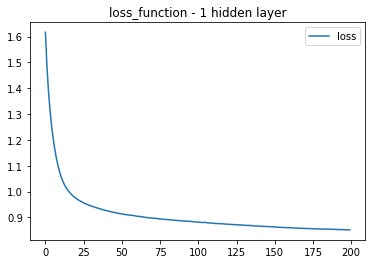

In [10]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [11]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [12]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 6ms/step - loss: 31.1830 - mse: 31.1830 - val_loss: 28.5801 - val_mse: 28.5801
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 27.2958 - mse: 27.2958 - val_loss: 25.7484 - val_mse: 25.7484
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 23.6274 - mse: 23.6274 - val_loss: 22.6294 - val_mse: 22.6294
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 19.6643 - mse: 19.6643 - val_loss: 19.1314 - val_mse: 19.1314
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 15.3828 - mse: 15.3828 - val_loss: 15.3092 - val_mse: 15.3092
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 11.6876 - mse: 11.6876 - val_loss: 11.4111 - val_mse: 11.4111
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 7.8839 - mse: 7.8839 - val_loss: 8.0948 - val_mse: 8.0948
Epoch 8/200
35/35 [==============================] - 0s 3ms

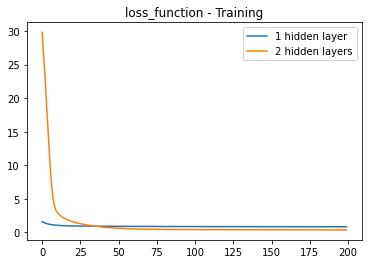

In [13]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

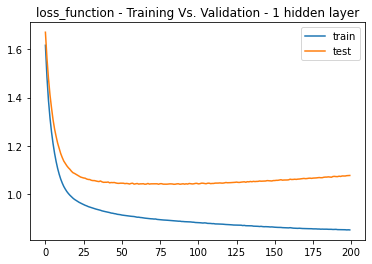

In [14]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

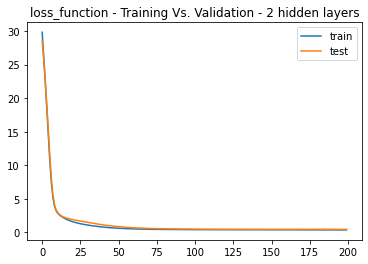

In [15]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [16]:
pred = nn.predict(X[0:10])